In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
import numpy as np
import itertools as it
import copy as cp
from typing import Tuple

# import data

In [2]:
data=pd.read_csv("data-breastCancer.csv")

First five rows of data

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


shape of the data

In [4]:
data.shape

(569, 33)

### Statistical Descriptive of each feature in the dataset

In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


#### Scatter plot

<AxesSubplot:xlabel='radius_mean', ylabel='texture_mean'>

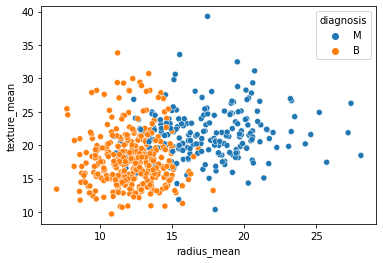

In [6]:
sns.scatterplot(x="radius_mean",y="texture_mean",data=data,hue="diagnosis")

<AxesSubplot:xlabel='area_mean', ylabel='concavity_mean'>

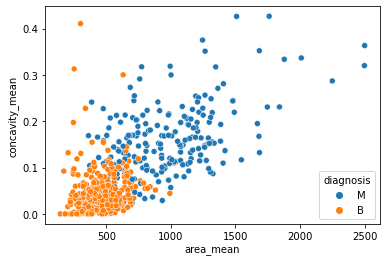

In [7]:
sns.scatterplot(x="area_mean",y="concavity_mean",data=data,hue="diagnosis")

<AxesSubplot:xlabel='texture_worst', ylabel='perimeter_worst'>

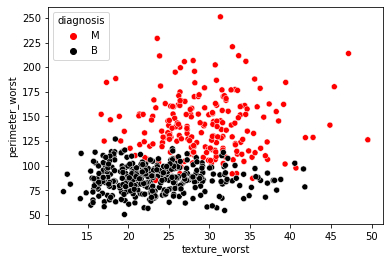

In [8]:
sns.scatterplot(x="texture_worst",y="perimeter_worst",data=data,hue="diagnosis",palette={"M":"red","B":"black"})

<AxesSubplot:xlabel='symmetry_worst', ylabel='concave points_worst'>

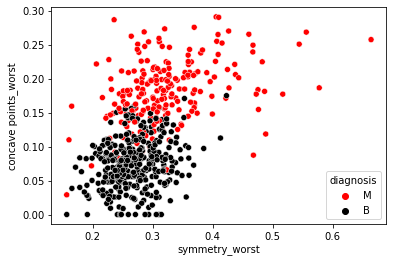

In [9]:
sns.scatterplot(x="symmetry_worst",y="concave points_worst",data=data,hue="diagnosis",palette={"M":"red","B":"black"})

In [10]:
def with_hue(ax, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in ax.patches]
    patch = [p for p in ax.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)

def without_hue(ax, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()+1
        ax.annotate(percentage, (x, y), size = 12)

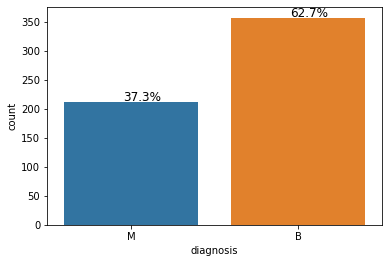

In [11]:
ax=sns.countplot(x="diagnosis",data=data)
without_hue(ax,data.diagnosis)

# 37.3% percent of the data is Maligant and 62.7% data is Benign 

# Data cleaning

In [162]:
## Delete id and Unnamed: 32 columns because we can't use them features

In [12]:
del data['Unnamed: 32']
del data['id']

In [13]:
## check null values in data

In [14]:
data.isnull().any()

diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_worst             False
fractal_di

## Drop duplicates rows in the dataset

In [15]:
data.drop_duplicates(subset=None,inplace=True)

## Separate Features and Labels 

In [16]:
Labels=data[["diagnosis"]]

In [17]:
features=data.loc[0:,"radius_mean":]
features.shape

(569, 30)

## Heatmap

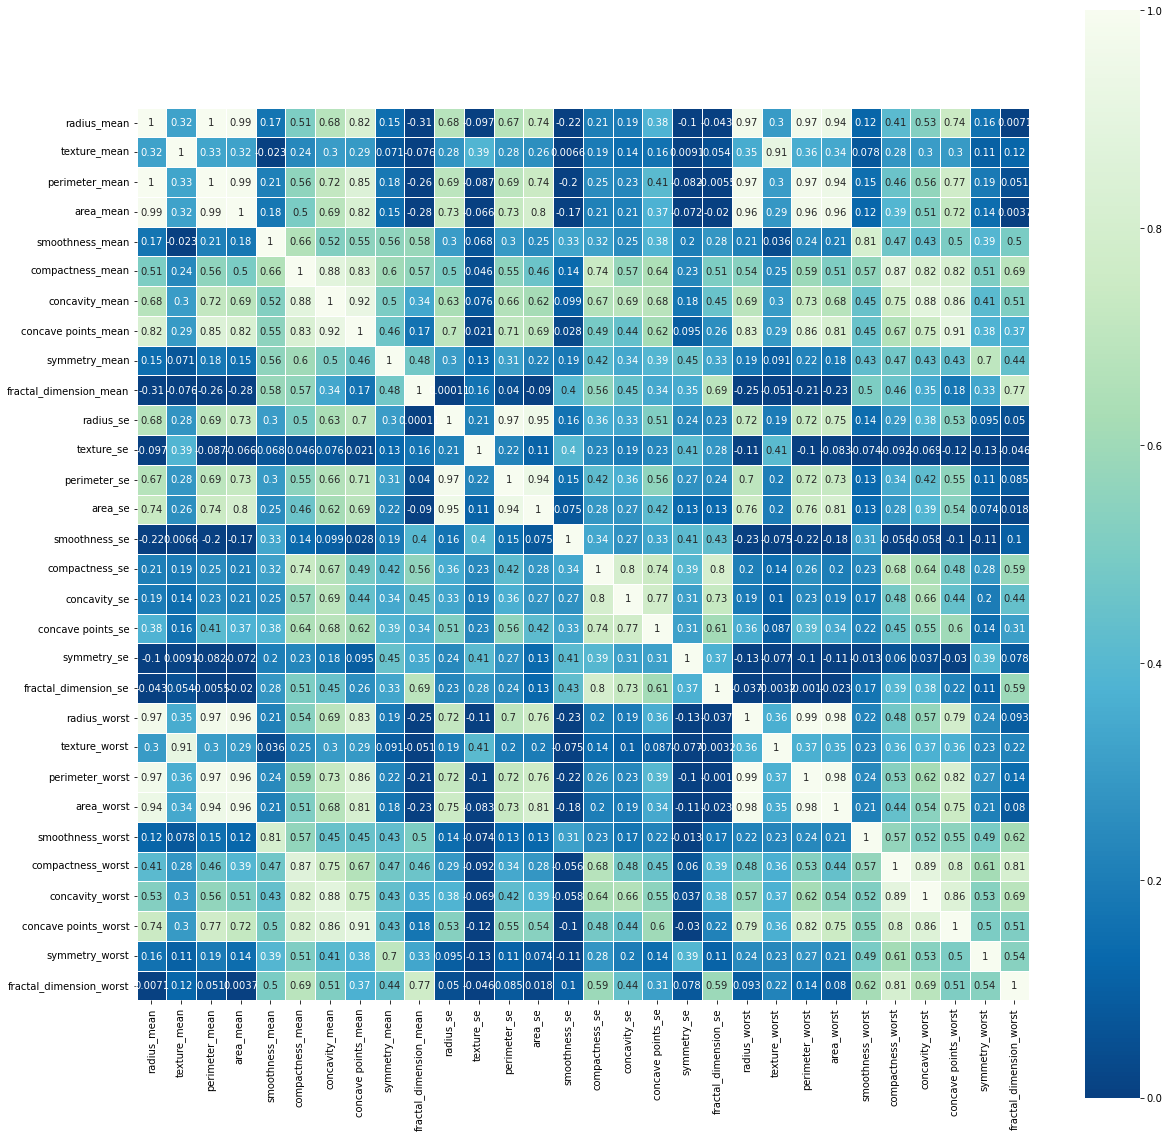

In [18]:
# heat map shows the correlation coefficient between each feature
fig, ax = plt.subplots(figsize=(20,20))  
corr=features.corr()
sns.heatmap(corr,cbar=1, linewidths=0.5,vmax=1, vmin=0, square=True, cmap='GnBu_r',annot=True)
plt.savefig("heatmap.jpg")
plt.show()

# Data normalization

In [19]:
## Normalize the Data
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
F_norm = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
F_norm.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


### Encoding the Labels

In [20]:
Labels=Labels.replace(['B','M'],[0,1])

In [21]:
Labels

,diagnosis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


### Split the data into 80% train and 20% test data

In [22]:
X_train,X_test,Y_train,Y_test=train_test_split(F_norm ,Labels,test_size=0.20,random_state=12)

In [174]:
print("Shape of X_train and X_test is {} {} respectively".format(X_train.shape,X_test.shape))

Shape of X_train and X_test is (455, 30) (114, 30) respectively


## Random Forest Classification 

In [25]:
RF_model=RandomForestClassifier()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### Train the model

In [44]:
RF_model.fit(X_train,Y_train.values.ravel())

RandomForestClassifier()

## Test the performance model on test dataset

In [45]:
y_pred=RF_model.predict(X_test)

## Confusion Matrix

In [165]:
def plot_confusion_matrix(a,cm,classes,normalize=False,title='Confusion Matrix',cmap=plt.cm.Greens):
    plt.rcParams["figure.figsize"] = (25,18)
    plt.subplot(3,4,a)
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks,classes)
    plt.yticks(tick_marks,classes)
    if normalize:
        cm=cm.astype('float'/cm.sum(axis=1))[:,np.newaxis]
        print("normalize confusion matrix" )
    else:
        print("Confusion matrix, without normalization")
    print(cm)
    thresh=cm.max()/2
    for i,j in it.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')
    #plt.tight_layout()
    plt.ylabel("True Label",fontweight="bold")
    plt.xlabel("Predicted Label",fontweight="bold")
    plt.savefig("confusion_matrix.jpg")

1


TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

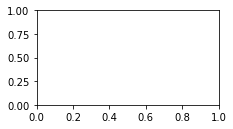

In [120]:
actual_classes, predicted_classes, _ = cross_val_predict(RF_model, kfold, F_norm.to_numpy(), Labels.to_numpy())

Confusion matrix, without normalization
[[65  1]
 [ 7 41]]


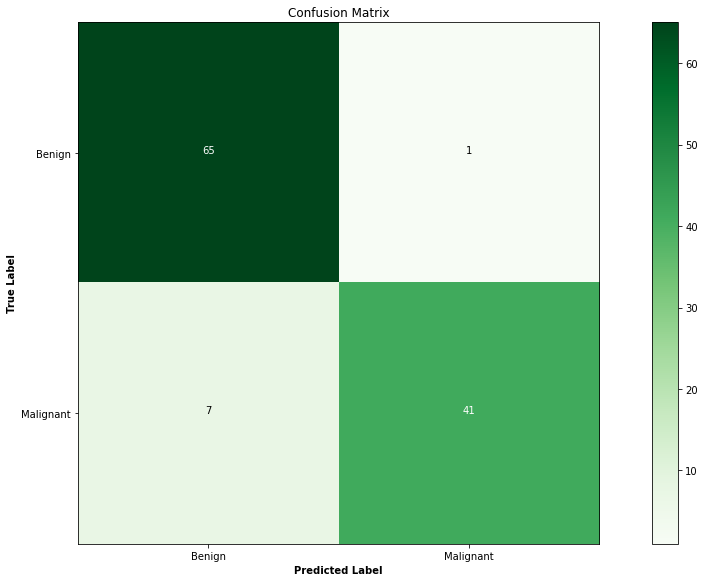

In [65]:
cm=confusion_matrix(Y_test,y_pred)
cm_plot_label=['Benign','Malignant']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

### ROC curve

## Kfold crosss validation

In [69]:
n = KFold(n_splits=10)
scores = cross_val_score(RF_model, 
        X_train, 
        Y_train.values.ravel(), 
        cv = n)

In [72]:
for i in range(0, len(scores)):
        print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))

Cross validation run 0:  0.870
Cross validation run 1:  0.978
Cross validation run 2:  0.957
Cross validation run 3:  0.978
Cross validation run 4:  0.957
Cross validation run 5:  0.978
Cross validation run 6:  1.000
Cross validation run 7:  0.978
Cross validation run 8:  0.956
Cross validation run 9:  0.911
Accuracy:  0.956 (+/-  0.018)


Confusion matrix, without normalization
[[65  1]
 [ 7 41]]


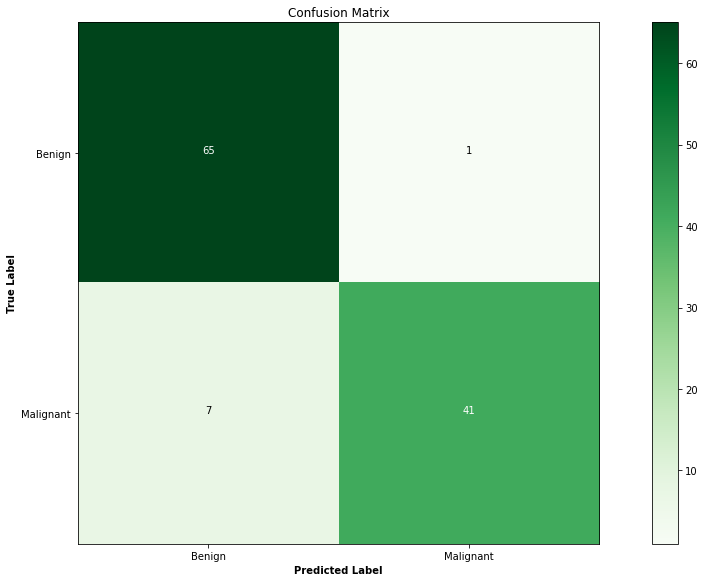

In [73]:
y_pred=RF_model.predict(X_test)
cm=confusion_matrix(Y_test,y_pred)
cm_plot_label=['Benign','Malignant']
plot_confusion_matrix(cm,cm_plot_label,title='Confusion Matrix')

In [114]:
score=RF_model.score(X)

NameError: name 'X' is not defined

In [ ]:
def cross_val_metrics(fit, training_set, class_set, estimator, print_results = True):
    """
    Purpose
    ----------
    Function helps automate cross validation processes while including 
    option to print metrics or store in variable

    Parameters
    ----------
    fit: Fitted model 
    training_set:  Data_frame containing 80% of original dataframe
    class_set:     data_frame containing the respective target vaues 
                      for the training_set
    print_results: Boolean, if true prints the metrics, else saves metrics as 
                      variables

    Returns
    ----------
    scores.mean(): Float representing cross validation score
    scores.std() / 2: Float representing the standard error (derived
                from cross validation score's standard deviation)
    """
    my_estimators = {
    'rf': 'estimators_',
    'nn': 'out_activation_',
    'knn': '_fit_method'
    }
    try:
        # Captures whether first parameter is a model
        if not hasattr(fit, 'fit'):
            return print("'{0}' is not an instantiated model from scikit-learn".format(fit)) 

        # Captures whether the model has been trained
        if not vars(fit)[my_estimators[estimator]]:
            return print("Model does not appear to be trained.")

    except KeyError as e:
        print("'{0}' does not correspond with the appropriate key inside the estimators dictionary. \
\nPlease refer to function to check `my_estimators` dictionary.".format(estimator))
        raise

    n = KFold(n_splits=10)
    scores = cross_val_score(fit, 
                         training_set, 
                         class_set, 
                         cv = n)
    if print_results:
        for i in range(0, len(scores)):
            print("Cross validation run {0}: {1: 0.3f}".format(i, scores[i]))
        print("Accuracy: {0: 0.3f} (+/- {1: 0.3f})"\
              .format(scores.mean(), scores.std() / 2))
    else:
        return scores.mean(), scores.std() / 2

In [85]:
Labels.to_numpy()

array([[1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
    

In [36]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y.ravel())
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

In [37]:
def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()

[1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0
 0 1 1 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0
 1 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0
 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 0 0 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 1 

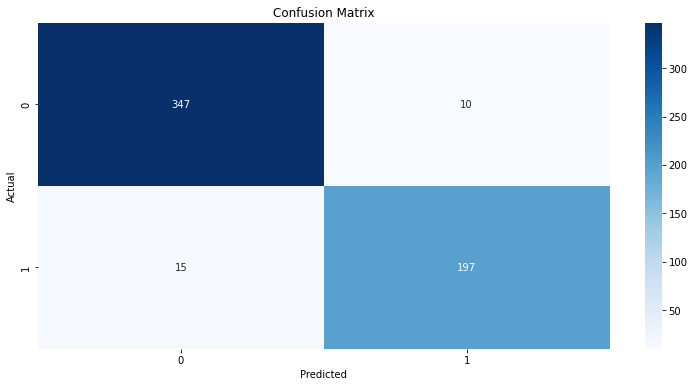

In [38]:

actual_classes, predicted_classes, _ = cross_val_predict(RF_model, kfold, F_norm.to_numpy(), Labels.to_numpy())
print(actual_classes)
plot_confusion_matrix(actual_classes, predicted_classes, [0, 1])

In [166]:
def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 
    Y_Test=[]
    Y_Pred=[]
    a=0
    for train_ndx, test_ndx in kfold.split(X):
        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]
        actual_classes = np.append(actual_classes, test_y)
        a+=1
        # Create just a figure and only one subplot
        model_.fit(train_X, train_y.ravel())
        y_pred=model_.predict(test_X)
        cm=confusion_matrix(test_y,y_pred)
        cm_plot_label=['Benign','Malignant']
        title="Confusion Matrix_"+str(a)
        plot_confusion_matrix(a,cm,cm_plot_label,title=title)
        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)
    return actual_classes, predicted_classes, predicted_proba
    plt.show()

Confusion matrix, without normalization
[[39  1]
 [ 1 16]]
Confusion matrix, without normalization
[[31  0]
 [ 2 24]]
Confusion matrix, without normalization
[[37  0]
 [ 0 20]]
Confusion matrix, without normalization
[[38  2]
 [ 1 16]]
Confusion matrix, without normalization
[[38  1]
 [ 2 16]]
Confusion matrix, without normalization
[[31  1]
 [ 2 23]]
Confusion matrix, without normalization
[[39  1]
 [ 0 17]]
Confusion matrix, without normalization
[[30  1]
 [ 1 25]]
Confusion matrix, without normalization
[[30  0]
 [ 2 25]]
Confusion matrix, without normalization
[[36  1]
 [ 1 18]]


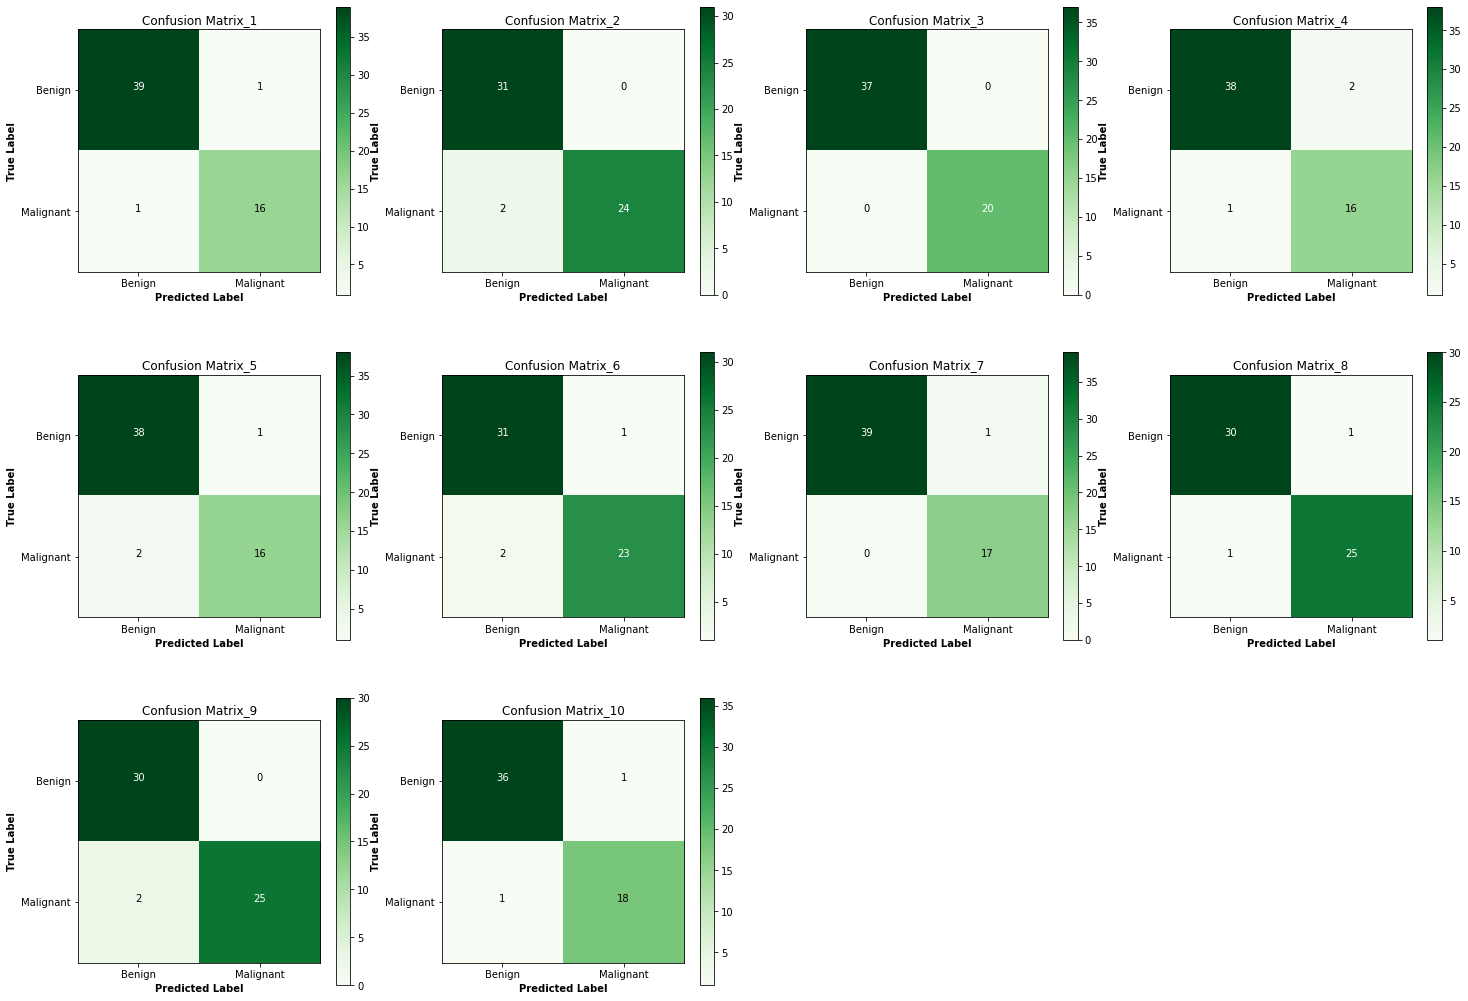

In [167]:
kfold = KFold(n_splits=10, random_state=42, shuffle=True)
actual_classes, predicted_classes, _ = cross_val_predict(RF_model, kfold, F_norm.to_numpy(), Labels.to_numpy())


In [147]:
def hell(a):
    print("Hello")